In [9]:
def cal_pop_fitness(equation_inputs, pop):
     # Calculating the fitness value of each solution in the current population.
     # The fitness function calculates the sum of products between each input and its corresponding weight.
     fitness = numpy.sum(pop*equation_inputs, axis=1)
     return fitness

def select_mating_pool(pop, fitness, num_parents):

    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.

    parents = numpy.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):

        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))

        max_fitness_idx = max_fitness_idx[0][0]

        parents[parent_num, :] = pop[max_fitness_idx, :]

        fitness[max_fitness_idx] = -99999999999

    return parents

import random

#crossover = not uniform
def crossover(parents, offspring_size):
     offspring = numpy.empty(offspring_size)
     # The point at which crossover takes place between two parents. Usually, it is at the center.
     crossover_point = numpy.uint8(offspring_size[1]/2)
 
     for k in range(offspring_size[0]):

         # Index of the first parent to mate.
         parent1_idx = k%parents.shape[0]
         # Index of the second parent to mate.
         parent2_idx = (k+1)%parents.shape[0]
         # The new offspring will have its first half of its genes taken from the first parent.
         offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
         # The new offspring will have its second half of its genes taken from the second parent.
         offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
     return offspring



def mutation(offspring_crossover):
    
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):

         # The random value to be added to the gene.

         random_value = numpy.random.uniform(-1.0, 1.0, 1)
         offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [10]:
#Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6
# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]
 # Number of the weights we are looking to optimize.
num_weights = 6


import numpy

sol_per_pop = 8# Defining the population size.

pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.

#Creating the initial population.

new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)



num_generations = 2

num_parents_mating = 4
for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
     fitness = cal_pop_fitness(equation_inputs, new_population)
    # Selecting the best parents in the population for mating.
     parents = select_mating_pool(new_population, fitness, num_parents_mating)                               
 
     # Generating next generation using crossover.
     offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_weights))
 
     # Adding some variations to the offsrping using mutation.
     offspring_mutation = mutation(offspring_crossover)
# Creating the new population based on the parents and offspring.
     new_population[0:parents.shape[0], :] = parents
     new_population[parents.shape[0]:, :] = offspring_mutation


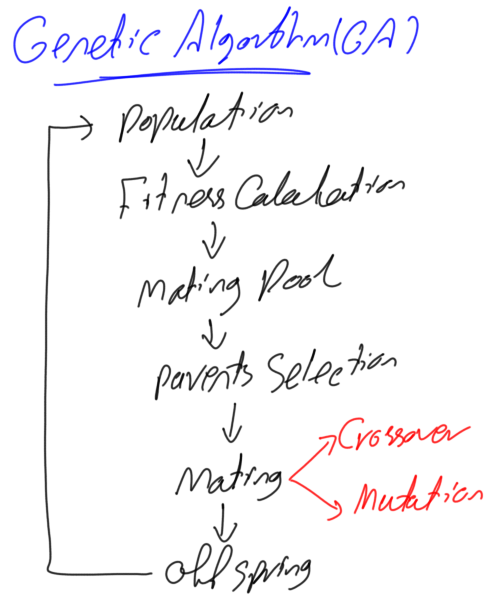

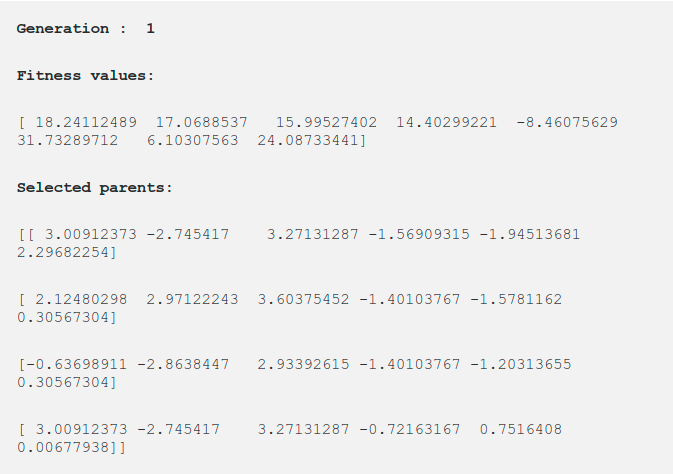

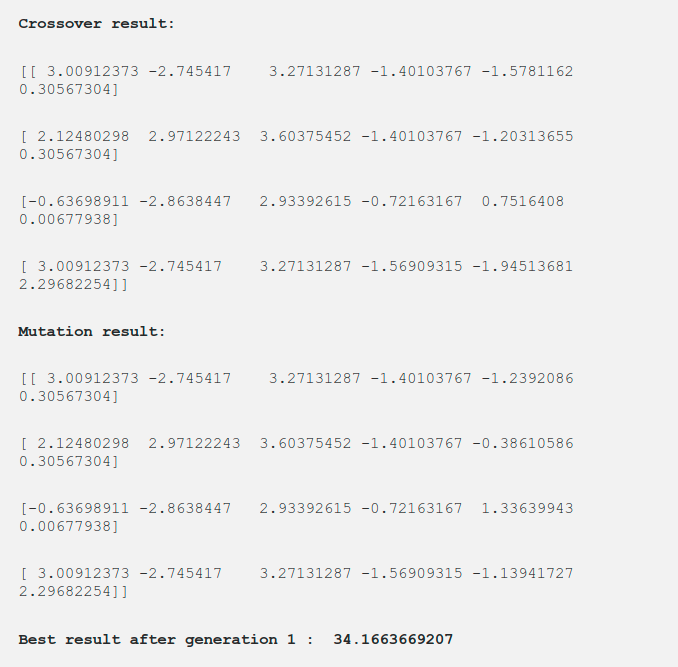

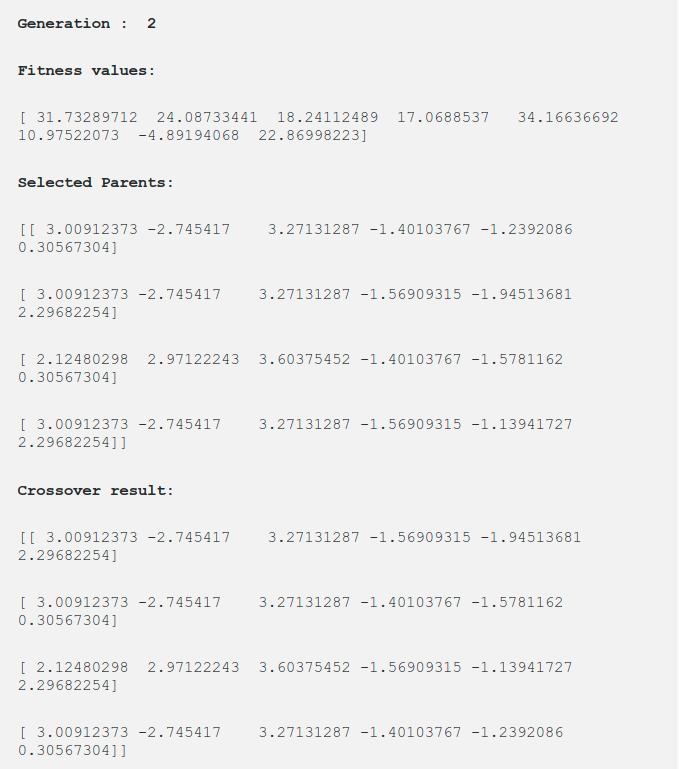

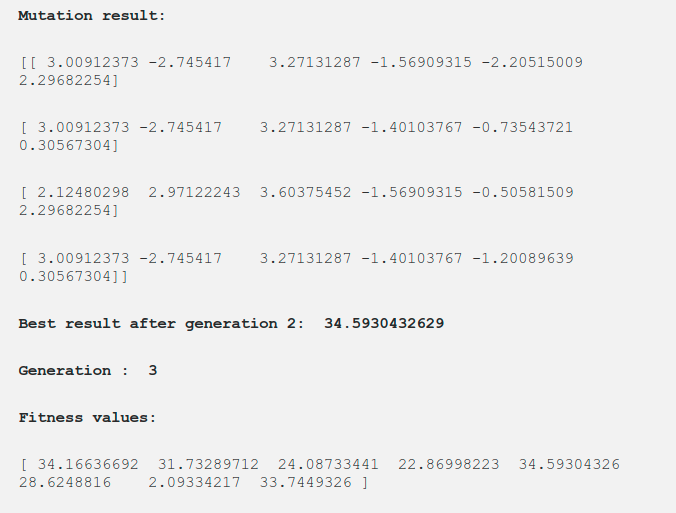

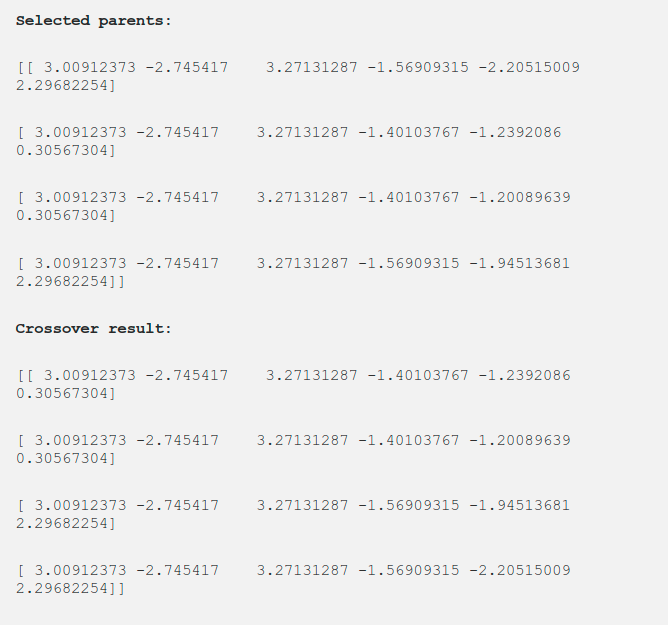

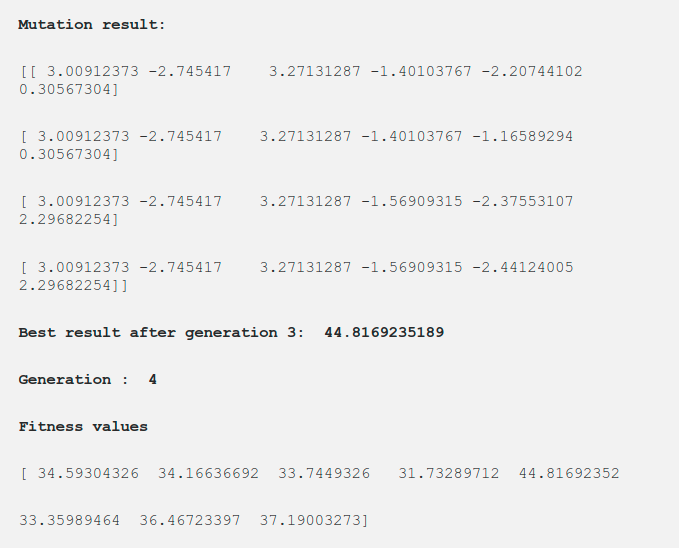

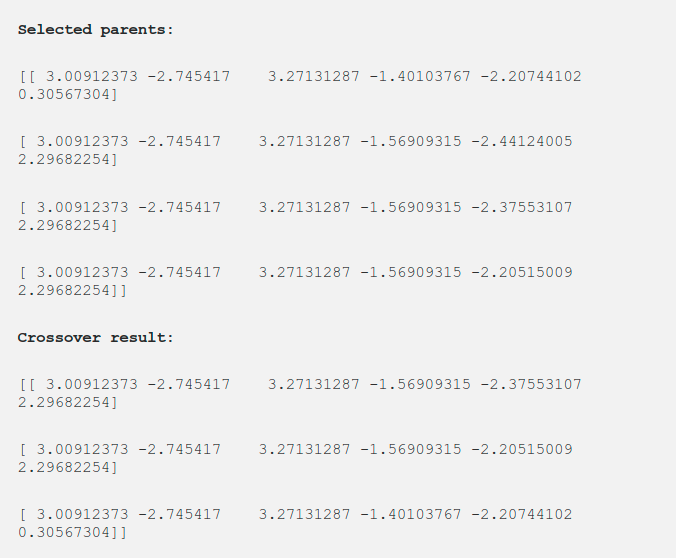

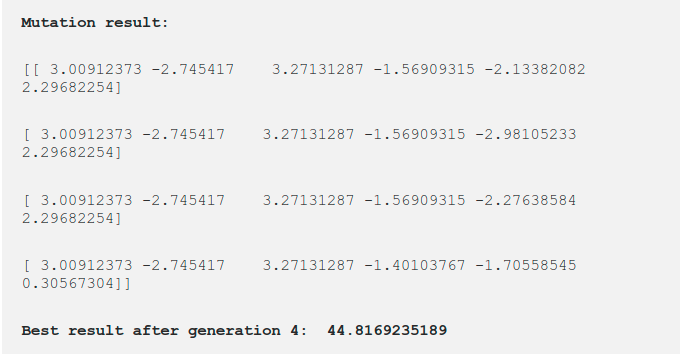

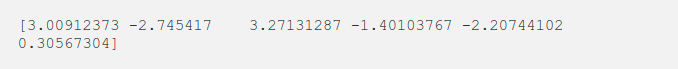